This is branched off from ethnicity plot file as the operation applied for both differ although initial filter logic is similar

In [ ]:
import pandas as pd

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


Plot for Johor First for 2025

In [2]:
population_data_johor = population_data[population_data['state'] == 'Johor']
population_data_johor.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [3]:
population_data_johor = population_data_johor[(population_data_johor['age'] == 'overall') &
                                              (population_data_johor['ethnicity'] != 'overall')].copy()
population_data_johor["year"] = pd.to_datetime(population_data_johor["date"]).dt.year
population_data_johor.head()

,state,date,sex,age,ethnicity,population,year
481,Johor,1980-01-01,both,overall,bumi,899.7,1980
482,Johor,1980-01-01,both,overall,chinese,634.7,1980
483,Johor,1980-01-01,both,overall,indian,109.3,1980
484,Johor,1980-01-01,both,overall,other,2.5,1980
571,Johor,1980-01-01,female,overall,bumi,450.4,1980


In [4]:
ETHNICITY_MAP = {
    'bumi' : 'Bumiputera',
    'bumi_malay': 'Bumiputera',
    'bumi_other': 'Bumiputera',
    'chinese': 'Chinese',
    'indian': 'Indian',
    'other': 'Other',
    'other_citizen': 'Other',
    'other_noncitizen': 'Other'
}

population_data_johor["ethnicity_group"] = population_data_johor["ethnicity"].map(ETHNICITY_MAP)
population_data_johor.head()

,state,date,sex,age,ethnicity,population,year,ethnicity_group
481,Johor,1980-01-01,both,overall,bumi,899.7,1980,Bumiputera
482,Johor,1980-01-01,both,overall,chinese,634.7,1980,Chinese
483,Johor,1980-01-01,both,overall,indian,109.3,1980,Indian
484,Johor,1980-01-01,both,overall,other,2.5,1980,Other
571,Johor,1980-01-01,female,overall,bumi,450.4,1980,Bumiputera


In [5]:
population_data_johor = population_data_johor[population_data_johor['year'] == 2025]
    
population_data_johor = population_data_johor.groupby(["state", "sex", "ethnicity_group"]).sum().reset_index()
population_data_johor = population_data_johor.drop(["date", "age", "ethnicity"], axis = 1).copy()
population_data_johor.head()

,state,sex,ethnicity_group,population,year
0,Johor,both,Bumiputera,2339.0,4050
1,Johor,both,Chinese,1213.7,2025
2,Johor,both,Indian,248.1,2025
3,Johor,both,Other,405.0,4050
4,Johor,female,Bumiputera,1151.9,4050


Form a Pivot Table

In [6]:
population_data_johor = population_data_johor[population_data_johor["sex"] != "both"].copy()
grouped = population_data_johor.pivot_table("population", index = "ethnicity_group",
                                         columns = ["sex"], aggfunc="sum")
grouped

sex,female,male
ethnicity_group,,
Bumiputera,1151.9,1187.1
Chinese,594.8,619.0
Indian,124.2,124.0
Other,80.6,324.4


Normalize Population by Ethnicity

In [7]:
grouped_prop = grouped / grouped.sum()
grouped_prop

sex,female,male
ethnicity_group,,
Bumiputera,0.590264,0.526547
Chinese,0.304791,0.274562
Indian,0.063643,0.055001
Other,0.041302,0.143890


<Axes: title={'center': 'Population by Ethnicity Proportion in Johor in 2025'}, xlabel='ethnicity_group'>

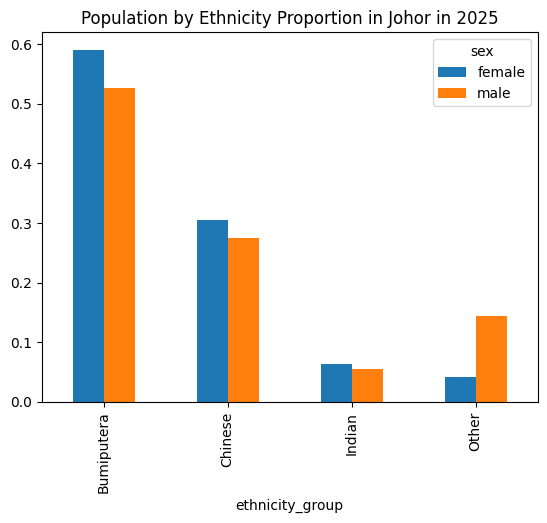

In [8]:
grouped_prop.plot(kind = "bar", title = f"Population by Ethnicity Proportion in Johor in 2025")

General Function for Ethnicity Proportion Line Plot for One Year

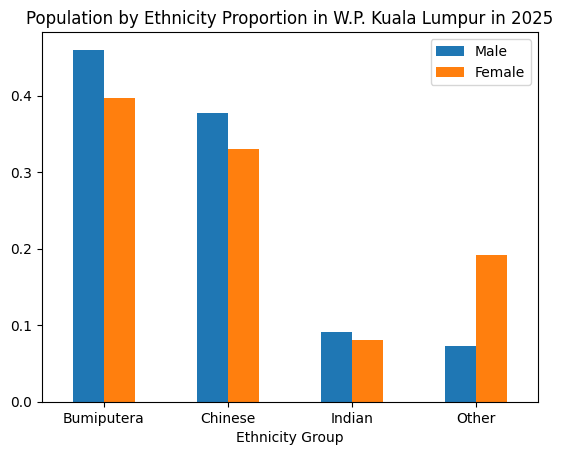

In [43]:
ETHNICITY_MAP = {
    'bumi' : 'Bumiputera',
    'bumi_malay': 'Bumiputera',
    'bumi_other': 'Bumiputera',
    'chinese': 'Chinese',
    'indian': 'Indian',
    'other': 'Other',
    'other_citizen': 'Other',
    'other_noncitizen': 'Other'
}

def filter_population_state_year(state, selected_year):
    state = state.strip().title()

    df = population_data[(population_data["state"] == state) & (population_data['age'] != 'overall')
                         & (population_data["ethnicity"] != "overall")].copy()

    df["year"] = pd.to_datetime(df["date"]).dt.year
    df["ethnicity_group"] = df["ethnicity"].map(ETHNICITY_MAP)

    df = df[df['year'] == selected_year]
    
    df = df.groupby(["state", "sex", "ethnicity_group"]).sum().reset_index()
    df = df.drop(["date", "age", "ethnicity"], axis = 1).copy()

    return df[df["sex"] != "both"].copy()

def grouped_by_ethnicity_plot(state, selected_year, normalized = False):
    df = filter_population_state_year(state, selected_year)

    grouped = df.pivot_table("population", index = "ethnicity_group",
                                         columns = ["sex"], aggfunc="sum")
    grouped.columns = ["Male", "Female"]
    grouped.index.name = "Ethnicity Group"
    
    if normalized:
        grouped_prop = grouped / grouped.sum()
        grouped_prop.plot(kind = "bar", rot = 0,
                          title = f"Population by Ethnicity Proportion in {state} in {selected_year}")
    else:
        grouped.plot(kind = "bar", title = f"Population by Ethnicity in {state} in {selected_year}", rot = 0)

grouped_by_ethnicity_plot("W.P. Kuala Lumpur", 2025, normalized = True)

General Function for Ethnicity Pie Chart for One Year

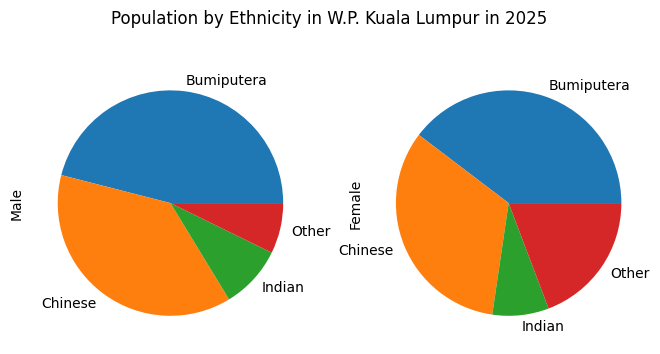

In [45]:
ETHNICITY_MAP = {
    'bumi' : 'Bumiputera',
    'bumi_malay': 'Bumiputera',
    'bumi_other': 'Bumiputera',
    'chinese': 'Chinese',
    'indian': 'Indian',
    'other': 'Other',
    'other_citizen': 'Other',
    'other_noncitizen': 'Other'
}

def filter_population_state_year(state, selected_year):
    state = state.strip().title()

    df = population_data[(population_data["state"] == state) & (population_data['age'] != 'overall')
                         & (population_data["ethnicity"] != "overall")].copy()

    df["year"] = pd.to_datetime(df["date"]).dt.year
    df["ethnicity_group"] = df["ethnicity"].map(ETHNICITY_MAP)

    df = df[df['year'] == selected_year]
    
    df = df.groupby(["state", "sex", "ethnicity_group"]).sum().reset_index()
    df = df.drop(["date", "age", "ethnicity"], axis = 1).copy()

    return df[df["sex"] != "both"].copy()

def grouped_by_ethnicity_plot(state, selected_year):
    df = filter_population_state_year(state, selected_year)

    grouped = df.pivot_table("population", index = "ethnicity_group",
                                         columns = ["sex"], aggfunc="sum")
    grouped = pd.DataFrame(grouped, index = ["Bumiputera", "Chinese", "Indian", "Other"], columns = ["female", "male"])
    grouped.columns = ["Male", "Female"]
    grouped.index.name = "Ethnicity Group"
    
    grouped.plot(kind = "pie", title = f"Population by Ethnicity in {state} in {selected_year}", 
                 subplots= True, figsize= (8, 4), legend= False, rot = 0)

grouped_by_ethnicity_plot("W.P. Kuala Lumpur", 2025)